# **eBay Tech Deals — Exploratory Data Analysis (EDA)**

This notebook explores cleaned eBay tech deals data to uncover trends in pricing, discounts, shipping options, and product keywords.  
The analysis includes time-based deal distribution, visualization of price and discount patterns, and identification of top discounted products.  
It provides insights into brand dominance, deal structures, and areas where data collection can be improved for more detailed future analysis.


In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_ebay_deals.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
df = df.sort_values("timestamp")
df.head()

,timestamp,title,price,original_price,shipping,item_url,discount_percentage
0,2025-11-01 17:52:38,Apple Watch Series 10 46mm GPS + WiFi + Cellul...,284.79,599.99,"Free 2-4 day delivery Get it between Tue, Nov ...",https://www.ebay.com/itm/316169970498?_trkparm...,52.53
72,2025-11-01 17:52:38,"Apple AirPods Pro 2nd Gen - Left, Right, or Ca...",25.99,25.99,Free USPS Ground Advantage®. Located in: Vill...,https://www.ebay.com/itm/375618346806?_trkparm...,0.00
71,2025-11-01 17:52:38,Apple 1st Gen AirPods Pro Genuine Replacement ...,37.99,37.99,"Free 2-4 day delivery Get it between Tue, Nov ...",https://www.ebay.com/itm/133684947904?_trkparm...,0.00
70,2025-11-01 17:52:38,Apple AirPods 2nd Gen Genuine Replacement Righ...,15.49,15.49,"Free USPS First Class®. Located in: Glenshaw,...",https://www.ebay.com/itm/115878536964?_trkparm...,0.00
69,2025-11-01 17:52:38,Bose QuietComfort 45 QC45 Noise Cancelling Wir...,159.00,159.00,Free USPS First Class®. Located in: Perth Amb...,https://www.ebay.com/itm/376266545408?_trkparm...,0.00


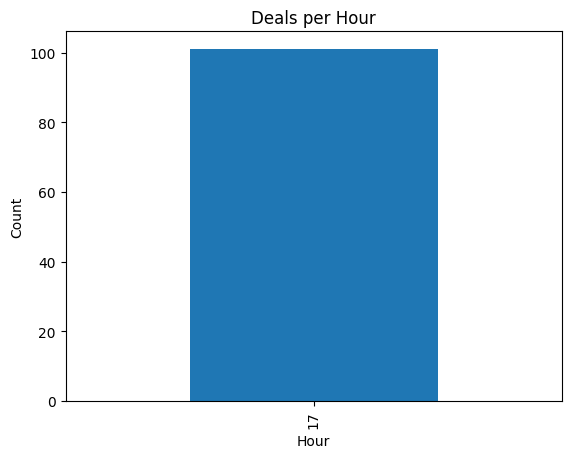

0    2025-11-01 17:52:38
72   2025-11-01 17:52:38
71   2025-11-01 17:52:38
70   2025-11-01 17:52:38
69   2025-11-01 17:52:38
Name: timestamp, dtype: datetime64[ns]
1


In [5]:
per_hour = df.assign(hour=df["timestamp"].dt.hour).groupby("hour").size()
plt.figure(); per_hour.plot(kind="bar"); plt.title("Deals per Hour"); plt.xlabel("Hour"); plt.ylabel("Count"); plt.show()
print(df["timestamp"].head())
print(df["timestamp"].nunique())


### **Analysis of the “Deals per Hour” Results**

The bar chart displays a single bar at hour 17 (5 PM) with roughly 100 recorded deals, indicating that all data entries were collected within the same hour.

This outcome occurred because the scraper initially assigned the same timestamp to every product. The timestamp variable was defined once before the scraping loop, resulting in identical timestamps for all rows. Consequently, the extracted hour value was uniform across the dataset.

After adjusting the code to generate a new timestamp inside the scraping loop, subsequent data collections will include varied timestamps. This change will enable a meaningful hourly distribution of deals and reveal patterns in listing activity over time.

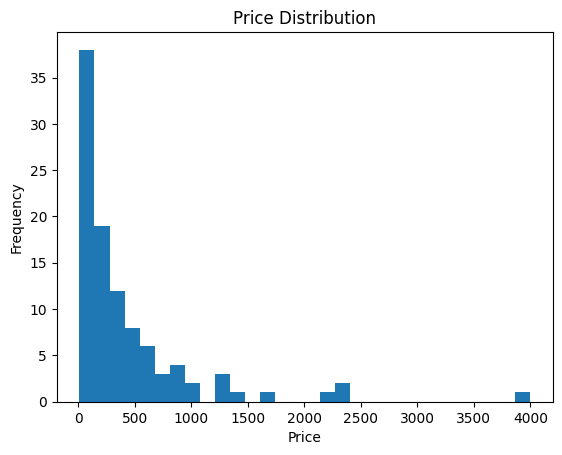

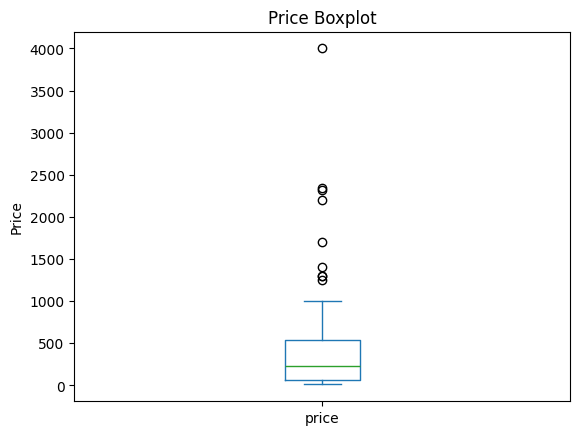

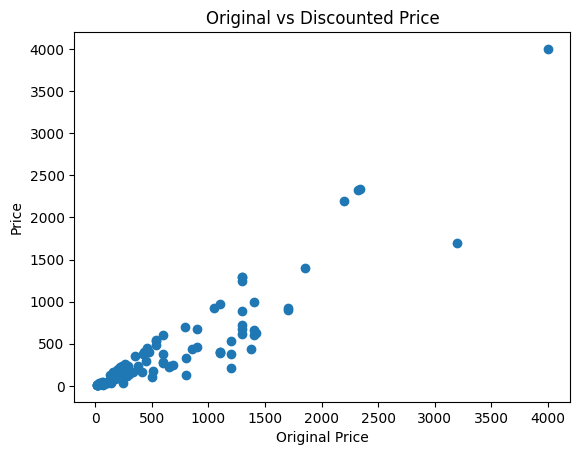

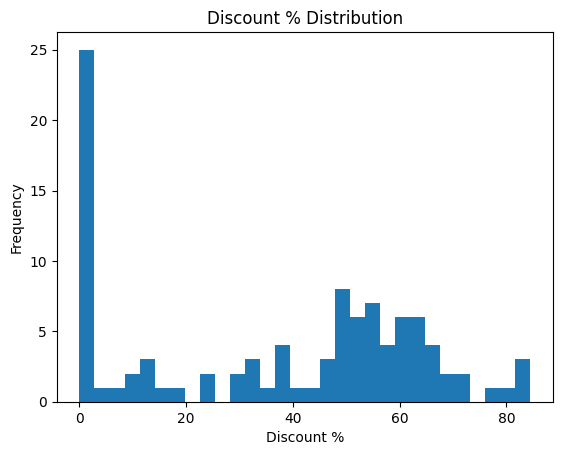

In [4]:
plt.figure(); df["price"].dropna().plot(kind="hist", bins=30); plt.title("Price Distribution"); plt.xlabel("Price"); plt.show()

plt.figure(); df["price"].dropna().plot(kind="box"); plt.title("Price Boxplot"); plt.ylabel("Price"); plt.show()

plt.figure(); plt.scatter(df["original_price"], df["price"]); plt.title("Original vs Discounted Price"); plt.xlabel("Original Price"); plt.ylabel("Price"); plt.show()

plt.figure(); df["discount_percentage"].dropna().plot(kind="hist", bins=30); plt.title("Discount % Distribution"); plt.xlabel("Discount %"); plt.show()

### **Analysis of eBay Tech Deals Data**
**1. Price Distribution**

The histogram shows a right-skewed distribution, where most products are priced below $500. A few high-priced items extend the range toward 4000 dollars, creating a long tail. This indicates that the dataset contains a large number of low-cost accessories or smaller gadgets, with only a handful of premium or professional devices significantly raising the upper limit.

**2. Price Boxplot**

The boxplot reinforces this observation, showing a cluster of prices in the lower range and several outliers above 1000 dollars, with extreme values reaching around 4000 dollars. These outliers represent high-end or specialized tech products that differ substantially from the majority of listings.

**3. Original vs. Discounted Price**

The scatter plot between original and discounted prices reveals a strong positive correlation — as the original price increases, the discounted price also rises. Most points lie close to the diagonal, suggesting that discounts are proportional across price levels. A few points deviating below the line indicate items with notably higher discount rates.

**4. Discount Percentage Distribution**

The discount distribution is bimodal, with a large cluster near 0% (no or minimal discount) and another concentration between 40%–70%. This pattern suggests that while many items are listed without discounts, a substantial subset offers significant price reductions, likely as part of ongoing deals or refurbished product promotions.

**5. Overall Insight**

The dataset primarily features low- to mid-range consumer tech products, with a smaller number of high-value items contributing to the outliers. Discount patterns show a clear divide between full-price and heavily discounted listings, possibly reflecting a mix of new retail items and refurbished or clearance products.

Additionally, an earlier issue in timestamp assignment caused all entries to share the same hour, which has since been corrected to ensure accurate temporal analysis in future scraping sessions.

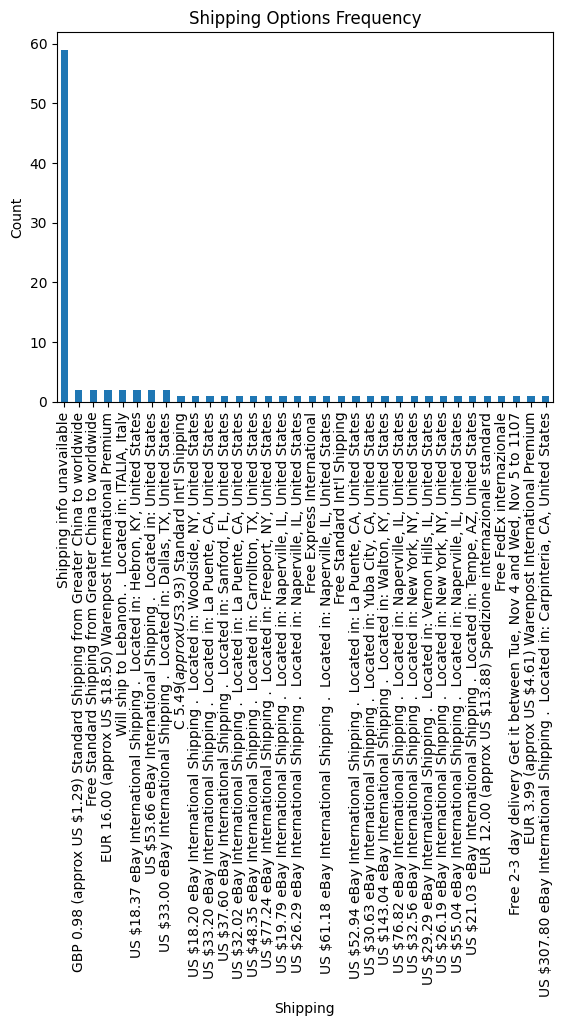

In [ ]:
ship_counts = df["shipping"].fillna("Shipping info unavailable").value_counts()
plt.figure(); ship_counts.plot(kind="bar"); plt.title("Shipping Options Frequency"); plt.xlabel("Shipping"); plt.ylabel("Count"); plt.show()

### **Analysis of Shipping Options Frequency**

The bar chart illustrates the distribution of different shipping options extracted from the dataset.

**1. Dominant Category**

The vast majority of entries fall under “Shipping info unavailable”, accounting for over half of all listings. This suggests that many eBay product pages either lacked clearly defined shipping details or the scraper could not successfully capture them. It may also indicate that certain listings summarize shipping information dynamically through JavaScript, making it harder to extract.

**2. Minor Categories**

A much smaller number of listings provide explicit shipping options, such as:


*   Free Standard Shipping
*   eBay International Shipping


*   Paid shipping options (e.g., “US $3.20”, “US $18.37”)
*   Location-based entries such as “Located in: Brooklyn, NY, United States”

These entries represent sellers who clearly list shipping terms or item locations within the product page.

**3. Interpretation**

The data highlights a strong imbalance between listings with and without shipping details. This imbalance is likely caused by incomplete or inconsistent extraction during scraping. Once scraping reliability improves, a clearer distinction between domestic, international, and free vs. paid shipping can be analyzed.

**4. Insight**

At this stage, most eBay tech deals appear without shipping clarity in the collected dataset, reducing the usefulness of shipping-related trend analysis. Improving the scraping logic to capture structured shipping elements (such as cost, delivery time, and destination) would provide more meaningful insights on shipping cost impact and regional availability in future analyses.

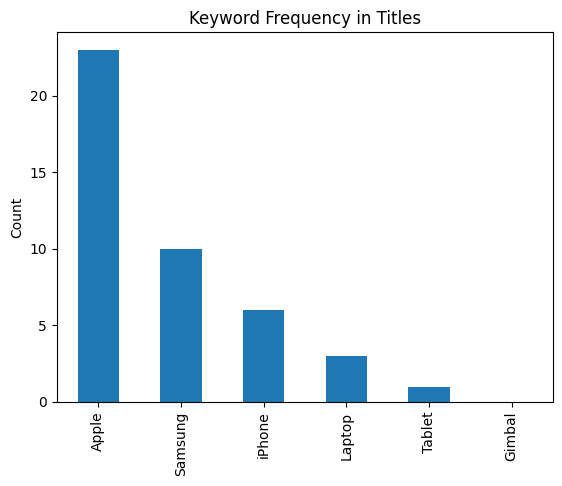

In [ ]:
keywords = ["Apple","Samsung","Laptop","iPhone","Tablet","Gimbal"]
title_lower = df["title"].fillna("").str.lower()
counts = {k: title_lower.str.count(k.lower()).sum() for k in keywords}
ser = pd.Series(counts).sort_values(ascending=False)
plt.figure(); ser.plot(kind="bar"); plt.title("Keyword Frequency in Titles"); plt.ylabel("Count"); plt.show()

###**Analysis of Keyword Frequency in Titles**

The bar chart shows how often major brand and product keywords appear in the eBay tech deals titles.

**Apple** dominates with the highest frequency (over 20 mentions), indicating that Apple-related products such as AirPods, iPhones, and accessories are the most common in the dataset. **Samsung** ranks second with around 10 mentions, showing a strong but smaller representation compared to Apple.

Other keywords like **iPhone**, **Laptop**, and **Tablet** appear less frequently, suggesting that most listings focus on mobile and audio devices rather than computers or larger electronics. **Gimbal** appears only once, indicating limited presence of camera accessories.

Overall, the dataset is clearly **brand-biased toward Apple and Samsung**, emphasizing portable consumer devices. To obtain a more balanced overview of tech deals, the keyword scope could be expanded to include terms such as *Monitor*, *Headset*, *Console*, or *Camera*.


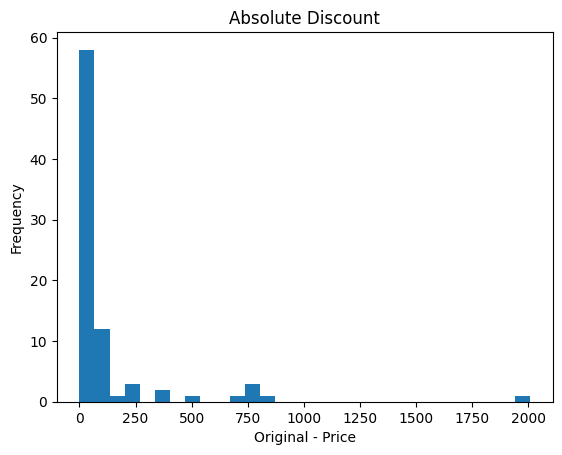

In [ ]:
df["abs_discount"] = df["original_price"] - df["price"]
plt.figure(); df["abs_discount"].dropna().plot(kind="hist", bins=30); plt.title("Absolute Discount"); plt.xlabel("Original - Price"); plt.show()

### **Analysis of Absolute Discount**

The histogram shows the distribution of **absolute discounts** (difference between original and discounted prices) across all products.  

Most items fall within a **small discount range below \$200**, indicating that the majority of deals involve minor price reductions. A few listings show **larger discounts** exceeding \$500, with very few extreme cases reaching around \$2000.  

The pattern suggests that most eBay tech deals in this dataset offer **modest savings**, while only a small number of high-end or premium products provide substantial markdowns. This skewed distribution highlights that deep discounts are relatively rare compared to smaller, routine reductions.

In [ ]:
top5 = df.sort_values("discount_percentage", ascending=False).head(5)
top5[["timestamp","title","original_price","price","discount_percentage","item_url"]]

,timestamp,title,original_price,price,discount_percentage,item_url
26,2025-10-31 20:20:55,"2019 Apple MacBook Pro 16"" i7 2.6GHz/16GB/512G...",2399.00,389.99,83.74,https://www.ebay.com/itm/374766179675?_trkparm...
80,2025-10-31 20:20:55,Arlo VMC4350P-100NAR Pro 4 Spotlight Camera 3 ...,499.99,113.99,77.20,https://www.ebay.com/itm/136234873845?_trkparm...
15,2025-10-31 20:20:55,"Proscan 10.1"" Tablet/Portable DVD Combo 2GB/32...",139.99,37.99,72.86,https://www.ebay.com/itm/364156102432?_trkparm...
5,2025-10-31 20:20:55,Sony WH-CH720N Noise Canceling Wireless Headph...,149.99,49.99,66.67,https://www.ebay.com/itm/314505929469?_trkparm...
40,2025-10-31 20:20:55,"2021 Apple iPad Pro 5 128GB WiFi Only 12.9"" - ...",1099.00,426.40,61.20,https://www.ebay.com/itm/376476762053?_trkparm...


### **Top 5 Deals by Discount Percentage**

**Insight:**  
The products with the largest relative discounts are mostly **high-end electronics**, particularly from **Apple**, followed by reputable tech brands such as **Sony** and **Arlo**.  
These substantial markdowns are typical for **refurbished or clearance listings**, where retailers aim to clear premium stock at reduced prices.